In [1]:
import numpy as np
import pandas as pd

from scipy.signal import find_peaks
from sklearn import preprocessing

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import to_rgb, to_rgba
matplotlib.rcParams['font.size'] = 8.0

# Part 1: Data processing and Finding spikes

In [2]:
data_tr = pd.read_csv('C:/Users/yyoon.ces/Desktop/NEURON 8.0 AMD64/Task/volt-data/data_tr.txt', sep="\t")
data_tl = pd.read_csv('C:/Users/yyoon.ces/Desktop/NEURON 8.0 AMD64/Task/volt-data/data_tl.txt', sep="\t")
data_br = pd.read_csv('C:/Users/yyoon.ces/Desktop/NEURON 8.0 AMD64/Task/volt-data/data_br.txt', sep="\t")
data_bl = pd.read_csv('C:/Users/yyoon.ces/Desktop/NEURON 8.0 AMD64/Task/volt-data/data_bl.txt', sep="\t")

data_tl.columns = ["time", "neuron9", "neuron10", "neuron11"]
data_tr.columns = ["time", "neuron0", "neuron1", "neuron2"]
data_br.columns = ["time", "neuron3", "neuron4", "neuron5"]
data_bl.columns = ["time", "neuron6", "neuron7", "neuron8"]

In [3]:
data_tl['avg'] = data_tl[['neuron9', 'neuron10', 'neuron11']].mean(axis=1)
data_tr['avg'] = data_tr[['neuron0', 'neuron1', 'neuron2']].mean(axis=1)
data_br['avg'] = data_br[['neuron3', 'neuron4', 'neuron5']].mean(axis=1)
data_bl['avg'] = data_bl[['neuron6', 'neuron7', 'neuron8']].mean(axis=1)

In [4]:
data_tr[:5]

,time,neuron0,neuron1,neuron2,avg
0,0.000,-65.0000,-65.0000,-65.0000,-65.000000
1,0.025,-64.9859,-64.9859,-64.9859,-64.985900
2,0.050,-64.9403,-64.9397,-64.9389,-64.939633
3,0.075,-64.8521,-64.8467,-64.8453,-64.848033
4,0.100,-64.7199,-64.7020,-64.6997,-64.707200


In [5]:
avg_tl = data_tl["avg"]
avg_tr = data_tr["avg"]
avg_br = data_br["avg"]
avg_bl = data_bl["avg"]

In [6]:
peaks_tl, _ = find_peaks(data_tl["avg"], height=-55)
peaks_tr, _ = find_peaks(data_tr["avg"], height=-55)
peaks_br, _ = find_peaks(data_br["avg"], height=-55)
peaks_bl, _ = find_peaks(data_bl["avg"], height=-55)

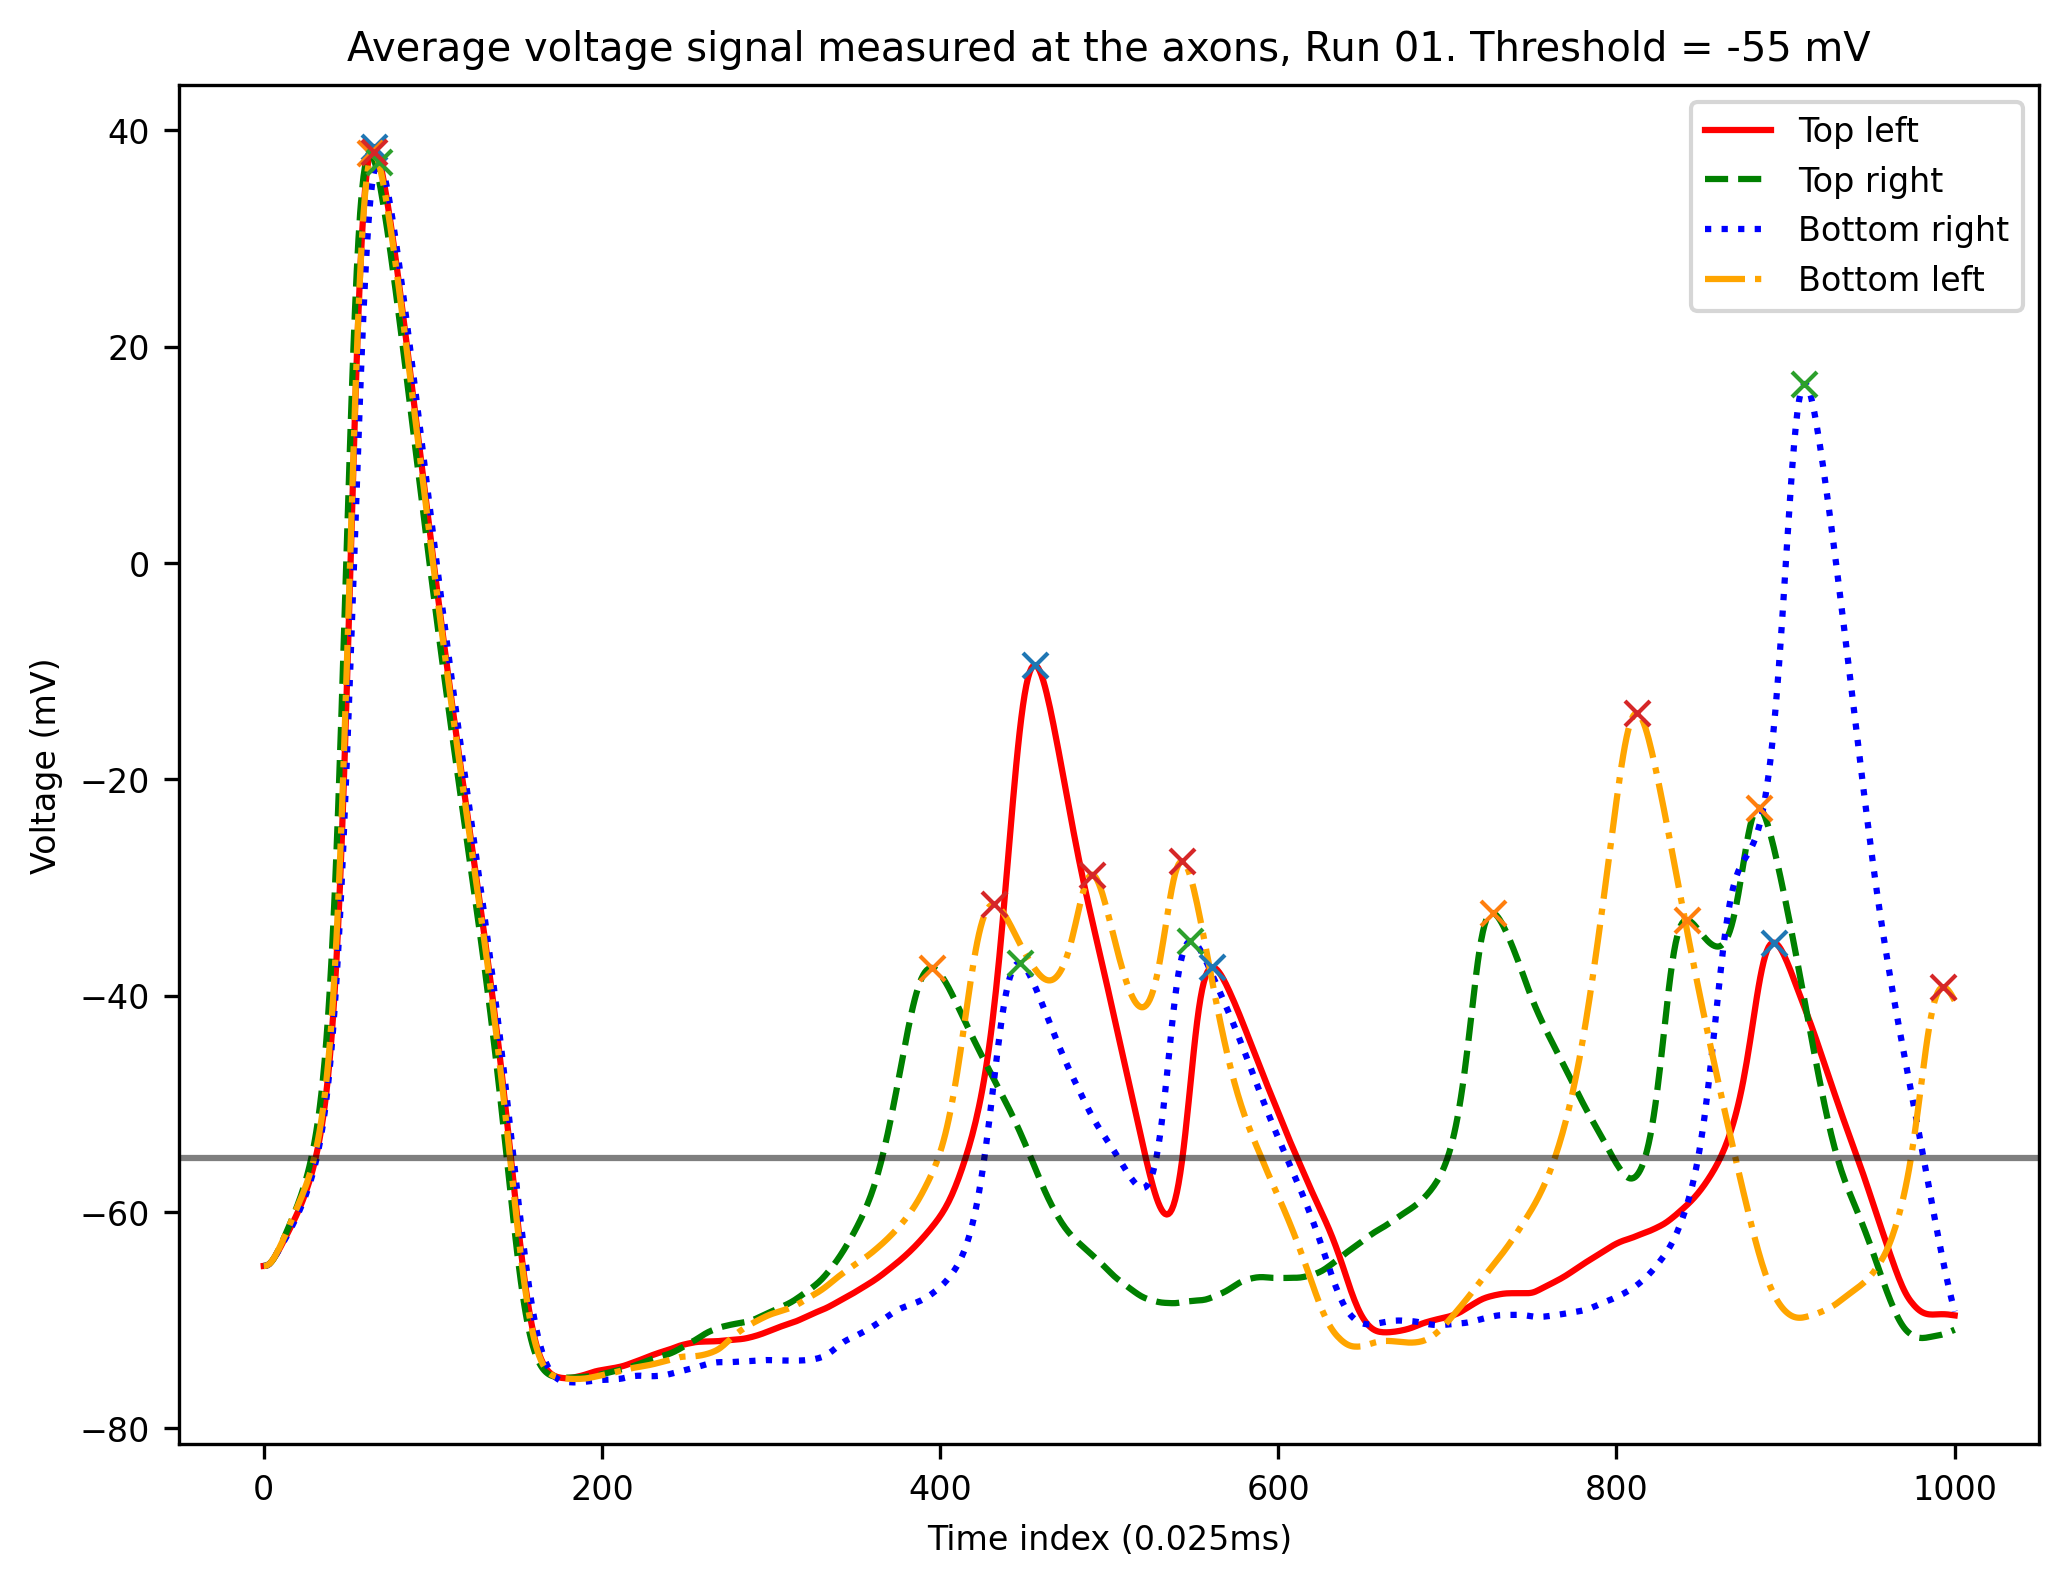

In [7]:
plt.figure(figsize=(8, 6), dpi=300)

plt.plot(data_tl["avg"], color="red", label="Top left", linestyle="solid")
plt.plot(data_tr["avg"], color="green", label="Top right", linestyle="dashed")
plt.plot(data_br["avg"], color="blue", label="Bottom right", linestyle="dotted")
plt.plot(data_bl["avg"], color="orange", label="Bottom left", linestyle="dashdot")

plt.plot(peaks_tl, avg_tl[peaks_tl], "x")
plt.plot(peaks_tr, avg_tr[peaks_tr], "x")
plt.plot(peaks_br, avg_br[peaks_br], "x")
plt.plot(peaks_bl, avg_bl[peaks_bl], "x")

plt.axhline(y=-55, color='k', linestyle='solid', alpha=0.5)
plt.title("Average voltage signal measured at the axons, Run 01. Threshold = -55 mV")
plt.xlabel("Time index (0.025ms)")
plt.ylabel("Voltage (mV)")
plt.legend()

plt.savefig("spike_demo.png", dpi=300)
plt.show()

# Part 2: Calculate spiking probability

In [8]:
peaks_tr

array([ 63, 395, 727, 842, 884], dtype=int64)

# Part 3: Event plot